在热图中，数据以矩阵的形式存在，属性范围用颜色的渐变来表示

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = load_iris()
x = data['data']
y = data['target']
col_names = data['feature_names']

In [3]:
# 根据平均值对数据进行缩放
x = scale(x, with_std=False)
x_ = x[1:26,] # 选取其中25组数据
y_labels = range(1, 26)

<Figure size 432x288 with 0 Axes>

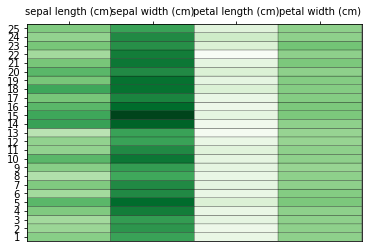

In [4]:
plt.close('all')
plt.figure(1)
fig, ax = plt.subplots()
ax.pcolor(x_, cmap=plt.cm.Greens, edgecolors='k')
ax.set_xticks(np.arange(0, x_.shape[1])+0.5) # 设置横纵坐标
ax.set_yticks(np.arange(0, x_.shape[0])+0.5)
ax.xaxis.tick_top() # x轴提示显示在图形上方
ax.yaxis.tick_left() # y轴提示显示在图形的左侧
ax.set_xticklabels(col_names, minor=False, fontsize=10) # 传递标签数据
ax.set_yticklabels(y_labels, minor=False, fontsize=10)
plt.show()

## 知识点

### 预处理

from sklearn.preprocessing import scale  
preprocessing是机器学习库中预处理的模块，这里需要将数据标准化

Standardization标准化:将特征数据的分布调整成标准正态分布，也叫高斯分布，也就是使得数据的均值为0，方差为1。  
    标准化的原因在于如果有些特征的方差过大，则会主导目标函数从而使参数估计器无法正确地去学习其他特征。  
    标准化的过程为两步：去均值的中心化（均值变为0）；方差的规模化（方差变为1）。  
    在sklearn.preprocessing中提供了一个scale的方法，可以实现以上功能。

In [5]:
from sklearn import preprocessing
import numpy as np

# 创建一组特征数据，每一行表示一个样本，每一列表示一个特征
xx = np.array([[1., -1., 2.],
              [2., 0., 0.],
              [0., 1., -1.]])

# 将每一列特征标准化为标准正太分布，注意，标准化是针对每一列而言的
xx_scale = preprocessing.scale(xx)

xx_scale

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [6]:
# 测试一下x_scale每列的均值方差
print('均值：', xx_scale.mean(axis=0))  # axis=0指列，axis=1指行
print('方差：', xx_scale.std(axis=0))

均值： [0. 0. 0.]
方差： [1. 1. 1.]


with_mean,with_std.这两个都是布尔型的参数，默认情况下都是true,但也可以自定义成false.即不要均值中心化或者不要方差规模化为1.

### 热图

pcolor绘制热图，并设置一些参数。在程序中注释了。